<a href="https://colab.research.google.com/github/Satyake/Deep-Learning/blob/master/bioconscious_project_2_Models_attempted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I have tried 2 models first is a standard stacked GRU model and the second is an ARIMA based model (AutoRegressive Integrated Moving Average). Please find the results enclosed with the code.

# Model 1  Stacked GRU- MULTIVARIATE MODEL

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  9 13:24:06 2021

@author: Satyake
"""
import keras 
from keras.layers import LSTM,GRU,Conv1D,Flatten,Dropout,BatchNormalization,TimeDistributed
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

import pandas as pd
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np 
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
import pandas as pd







In [197]:
glucose=pd.read_csv('/content/blood-glucose-data.csv')
glucose.drop('timezone_offset',inplace=True,axis=1)
glucose.head()
glucose.plot(kind='line'  ) #visualize the entire glucose_data with their respective timestamps
heart_rate=pd.read_csv('/content/heart-rate-data.csv')
heart_rate.drop('timezone_offset',inplace=True,axis=1)
heart_rate.head()
heart_rate.plot(kind='line')
dist=pd.read_csv('/content/distance-activity-data.csv')
dist.drop('timezone_offset',inplace=True,axis=1)
dist.plot()  #plotting the distance







,point_value(mg/dL)
point_timestamp,
2017-05-15 07:51:22,142
2017-05-15 07:56:23,140
2017-05-15 08:01:22,138
2017-05-15 08:06:22,136
2017-05-15 08:11:23,130


In [184]:
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
x1=glucose['point_value(mg/dL)']
x2=heart_rate['point_value']
x3=dist['point_value(kilometers)']
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
x1=x1[0:14702]
x2=x2[0:14702]
x3=x3[0:14702]
x1=pd.DataFrame(x1)
x2=pd.DataFrame(x2)
x3=pd.DataFrame(x3)


# Roughly 2.5 weeks was used for training and the remaining went into testing

In [185]:
concatenated=pd.concat([x1,x2,x3],axis=1)
concatenated.columns=['glucose','heart_rate','distance']
concatenated.corr()
#x11=concatenated.iloc[:,[0]].values
train_scaled1=SC.fit_transform(concatenated)
training=train_scaled1[0:4200]
testing=train_scaled1[4200:]

train_generator = TimeseriesGenerator(training, training, length=1, batch_size=32)     
test_generator = TimeseriesGenerator(testing, testing, length=1, batch_size=1)
model=Sequential()
model.add(LSTM(100,activation='tanh',return_sequences=True,input_shape=(1,3)))
#model.add(BatchNormalization())
model.add(GRU(100,activation='relu',return_sequences=True))
model.add(GRU(100,activation='relu',return_sequences=False))
model.add(Dense(100))
model.add(Dropout(0.4))
model.add(Dense(3))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_generator,epochs=20)

Epoch 1/20
132/132 [==============================] - 6s 11ms/step - loss: 1.2236
Epoch 2/20
132/132 [==============================] - 2s 11ms/step - loss: 1.5737
Epoch 3/20
132/132 [==============================] - 2s 12ms/step - loss: 1.2203
Epoch 4/20
132/132 [==============================] - 2s 11ms/step - loss: 1.1813
Epoch 5/20
132/132 [==============================] - 2s 11ms/step - loss: 1.1275
Epoch 6/20
132/132 [==============================] - 2s 11ms/step - loss: 1.2133
Epoch 7/20
132/132 [==============================] - 1s 11ms/step - loss: 1.6124
Epoch 8/20
132/132 [==============================] - 2s 11ms/step - loss: 1.2301
Epoch 9/20
132/132 [==============================] - 2s 12ms/step - loss: 1.4070
Epoch 10/20
132/132 [==============================] - 2s 12ms/step - loss: 1.0930
Epoch 11/20
132/132 [==============================] - 1s 11ms/step - loss: 1.6281
Epoch 12/20
132/132 [==============================] - 2s 11ms/step - loss: 1.3544
Epoch 13/20
1

In [186]:
predict1=predict[0:2000]
testing1=testing[0:2000]

In [187]:
predict=model.predict(test_generator)



In [163]:
predict_train=model.predict(train_generator)


In [155]:
predict.shape

(10501, 3)

#Visualisation of Predictions with the Test set.
(First 1000 chosen for clarity)

# First row for Glucose
# Second row for Heart Rate
# Third row for Dist

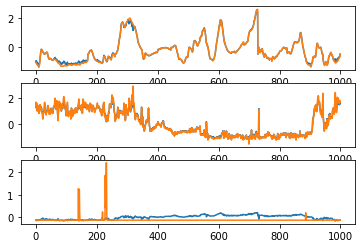

In [189]:


plt.title('Test Predictions')
plt.subplot(3,1,1)
plt.plot(predict[0:1000,[0]],label='predicted')   
plt.plot(testing[0:1000,[0]],label='test_truth')
plt.subplot(3,1,2)
plt.plot(predict[0:1000,[1]],label='predicted')   
plt.plot(testing[0:1000,[1]],label='test_truth')
plt.subplot(3,1,3)
plt.plot(predict[0:1000,[2]],label='predicted')   
plt.plot(testing[0:1000,[2]],label='test_truth')

#orange denotes predicted 
#blue denotes truth


# MSE of test set_predictions

In [190]:
mean_squared_error(predict[:,[0]],testing[:10501,[0]])  #MSE Stacked LSTM GRU model timestep=1 
#MSE of Glucose

0.01043517553067773

In [191]:
mean_squared_error(predict[:,[1]],testing[:10501,[1]])  #MSE Stacked LSTM GRU model timestep=1
#MSE of heartrate

0.020540157303367456

In [192]:
mean_squared_error(predict[:,[2]],testing[:10501,[2]])  #MSE Stacked LSTM GRU mode timestep=1
#MSE of distance covered

0.5905567855420742

In [169]:
test=test_generator.data

In [172]:
len(test)

10502

(1, 3)

# MODEL #2 ARIMA est.blood_glucose Univariate

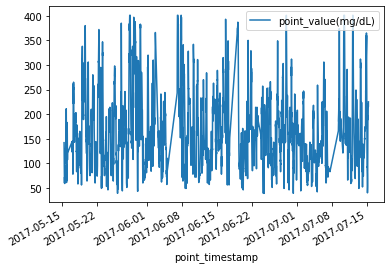

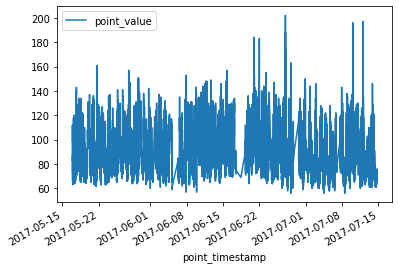

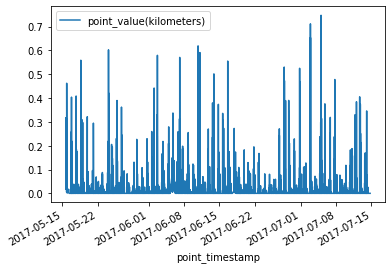

In [63]:
glucose=pd.read_csv('/content/blood-glucose-data.csv',index_col=1,parse_dates=True)
glucose.drop('timezone_offset',inplace=True,axis=1)
glucose.head()
glucose.plot(kind='line'  ) #visualize the entire glucose_data with their respective timestamps
heart_rate=pd.read_csv('/content/heart-rate-data.csv',index_col=1,parse_dates=True)
heart_rate.drop('timezone_offset',inplace=True,axis=1)
heart_rate.head()
heart_rate.plot(kind='line')
dist=pd.read_csv('/content/distance-activity-data.csv',index_col=1,parse_dates=True)
dist.drop('timezone_offset',inplace=True,axis=1)
dist.plot()  #plotting the distance







In [199]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [203]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 11.0MB/s 
     |████████████████████████████████| 2.1MB 48.4MB/s 
     |████████████████████████████████| 9.5MB 20.5MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [64]:
from pmdarima import auto_arima,plot_acf



In [109]:
glucose_resampled_by_hour=glucose.resample('60T').sum()

In [110]:
glucose_resampled_by_hour

,point_value(mg/dL)
point_timestamp,
2017-05-15 07:00:00,282
2017-05-15 08:00:00,1379
2017-05-15 09:00:00,910
2017-05-15 10:00:00,780
2017-05-15 11:00:00,1255
...,...
2017-07-15 03:00:00,519
2017-07-15 04:00:00,1286
2017-07-15 05:00:00,2300


# ARIMA orders established by Hyperparameter Tunning (GridSearch)

In [65]:
auto_arima(glucose['point_value(mg/dL)']).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14702
Model:               SARIMAX(3, 1, 1)   Log Likelihood              -47200.362
Date:                Tue, 09 Mar 2021   AIC                          94410.724
Time:                        22:10:20   BIC                          94448.702
Sample:                             0   HQIC                         94423.337
                              - 14702                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5502      0.045     12.361      0.000       0.463       0.637
ar.L2          0.0789      0.016      5.052      0.000       0.048       0.110
ar.L3          0.0690      0.009      7.947      0.000       0.052       0.086
ma.L1         -0.2081      0.045     -4.674      0.000      -0.295      -0.121
sigma2        35.9983      0.028   1263.835      0.000      35.943      36.054
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         127365448.89
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                       458.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [40]:
len(glucose_resampled_by_hour)

1465

In [95]:
model=SARIMAX(glucose['point_value(mg/dL)'],order=(3,1,1),seasonal_order=None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [96]:
train=glucose.iloc[:4200]
test=glucose.iloc[4200:]


In [97]:
fitted_model=model.fit()


In [83]:
len(test)

10502

In [98]:
start=len(train)
end=len(train)+len(test)-1
results=fitted_model.predict(start=start,end=end,typ='levels')

In [99]:
results

point_timestamp
2017-05-31 02:12:46     87.886276
2017-05-31 02:17:45     83.747656
2017-05-31 02:22:46     80.981984
2017-05-31 02:27:46     78.040667
2017-05-31 02:32:46     76.464036
                          ...    
2017-07-15 07:29:50    217.099019
2017-07-15 07:34:51    215.560248
2017-07-15 07:39:50    221.336092
2017-07-15 07:44:50    220.524823
2017-07-15 07:49:50    224.411728
Name: predicted_mean, Length: 10502, dtype: float64

# Visualisation of ARIMA prediction

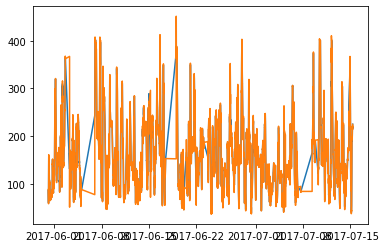

<Figure size 21600x7200 with 0 Axes>

In [80]:
plt.plot(test) 
plt.plot(results)
plt.figure(figsize=(300,100))
plt.show() 
#plotting last few points for readability

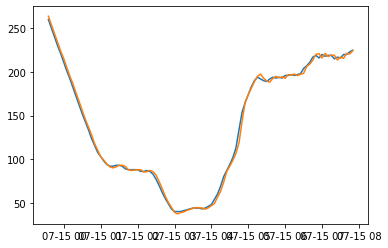

<Figure size 21600x7200 with 0 Axes>

In [84]:
plt.plot(test[10402:]) 
plt.plot(results[10402:])
plt.figure(figsize=(300,100))
plt.show() 
#plotting last few points for readability



```

```

# RMSE of the Trained ARIMA model

In [86]:
from statsmodels.tools.eval_measures import rmse
error=rmse(test['point_value(mg/dL)'],results)
error

6.252632471977822

# Predict into Unknown Future 
13 steps approximately equates to an hour of prediction 60 minutes into the future.

In [111]:
model_full=SARIMAX(glucose['point_value(mg/dL)'],order=(3,1,1),seasonal_order=None)
start=len(train)
end=len(train)+len(test)+13
fitted_model=model_full.fit()
results=fitted_model.predict(start=start,end=end,typ='levels')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [104]:
results

4200      87.886276
4201      83.747656
4202      80.981984
4203      78.040667
4204      76.464036
            ...    
14728    230.687910
14729    230.689041
14730    230.689911
14731    230.690580
14732    230.691095
Name: predicted_mean, Length: 10533, dtype: float64

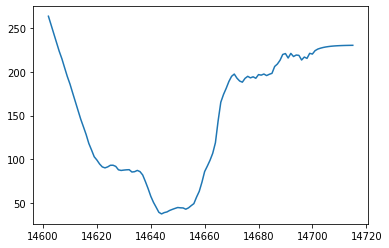

In [112]:
plt.plot(results[10402:])



In [117]:
results_df=pd.DataFrame(results)
results_df=results_df[10502:]

In [118]:
results_df

,predicted_mean
14702,226.214898
14703,227.248381
14704,228.051026
14705,228.658135
14706,229.126904
14707,229.488180
14708,229.765888
14709,229.979577
14710,230.144023
14711,230.270549


In [134]:
results_df
results_df['date'] = pd.date_range(start='7/14/2017 17:46', periods=len(results_df), freq='H')
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 14702 to 14715
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   predicted_mean  14 non-null     float64       
 1   date            14 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 356.0 bytes


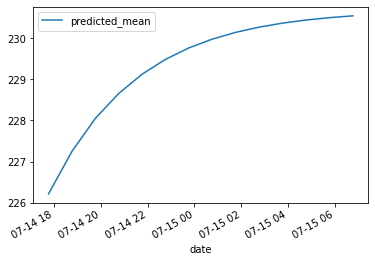

In [137]:
results_df.plot(x='date')


In [ ]:
results_df.plot()